Sinh viên: Huỳnh Thiện Tùng (19522492)
Bài tập 

In [1]:
import tensorflow as tf
from platform import python_version
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.datasets import make_circles
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd

In [2]:
print(tf.__version__)
print(python_version())

2.8.0
3.9.7


#  Sinh dữ liệu gồm 2 class là những điểm thuộc 2 đường tròn đồng tâm có bán kính khác nhau

Ta có phương trình đường tròn đầu tiên là (x-a)^2 + (y-b)^2 = r^2

x = r * cos(t) + a

y = r * sin(t) + b

## Sinh dữ liệu bằng cách thủ công

In [3]:
def generate_points(r, step_size=0.1, a=0, b=0):
    
    # create empty list to store x, y points
    x = []
    y = []
    
    t = 0
    while t < 2 * math.pi:
        x.append(r * math.cos(t) + a)
        y.append(r * math.sin(t) + b)
        t += step_size
    
    # convert to numpy array
    X = np.array(x)
    Y = np.array(y)
    
    # add noise
    n_sample = X.shape[0]
    noise = np.random.normal(0, 0.1, n_sample)
    X += noise
    Y += noise
    
    return X, Y

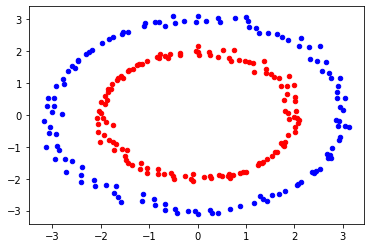

In [4]:
X1, Y1 = generate_points(r=2, step_size=0.05)
X2, Y2 = generate_points(r=3, step_size=0.05)

plt.scatter(X1, Y1, c='red', s=20)
plt.scatter(X2, Y2, c='blue', s=20)
plt.show()

## Sinh dữ liệu sử dụng thư viện sklearn.datasets.make_circles

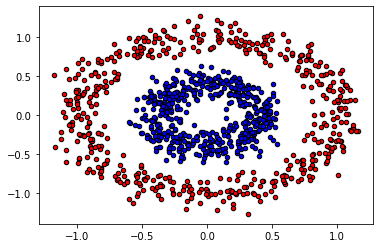

In [5]:
data, labels = make_circles(n_samples=1000, noise=0.1, factor=0.4)

reds = labels == 0
blues = labels == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()

# Build model

In [6]:
model = tf.keras.Sequential()
model.add(Dense(128, input_dim=2, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(2, kernel_initializer='he_normal'))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 17,154
Trainable params: 17,154
Non-traina

In [7]:
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.01, decay=1e-6), metrics=['accuracy'])

In [8]:
history = model.fit(data, pd.get_dummies(labels), validation_split=0.2, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 0.6380 - accuracy: 0.5050 - val_loss: 0.6430 - val_accuracy: 0.4800
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6206 - accuracy: 0.5100 - val_loss: 0.6306 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.5125 - val_loss: 0.6205 - val_accuracy: 0.4800
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.5100 - val_loss: 0.6105 - val_accuracy: 0.4800
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.5088 - val_loss: 0.6031 - val_accuracy: 0.4800
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.5100 - val_loss: 0.5951 - val_accuracy: 0.4800
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5768 - accuracy: 0.5125 - val_loss: 0.5875 - val_accuracy: 0.4800
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.9775 - val_loss: 0.3063 - val_accuracy: 0.9750
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.9812 - val_loss: 0.3026 - val_accuracy: 0.9750
Epoch 61/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2972 - accuracy: 0.9775 - val_loss: 0.2983 - val_accuracy: 0.9750
Epoch 62/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.9787 - val_loss: 0.2942 - val_accuracy: 0.9750
Epoch 63/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2898 - accuracy: 0.9837 - val_loss: 0.2904 - val_accuracy: 0.9750
Epoch 64/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9825 - val_loss: 0.2868 - val_accuracy: 0.9750
Epoch 65/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2823 - accuracy: 0.9837 - val_loss: 0.2830 - val_accuracy: 0.9800
Epoch 66/100
7/7 [===============

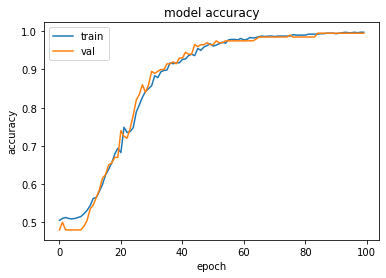

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

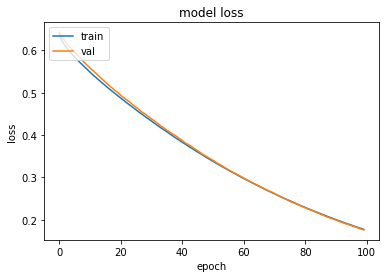

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Dự đoán lại trên tập dataset

In [11]:
predictions = np.argmax(model.predict(data), axis=1)

In [12]:
predictions

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

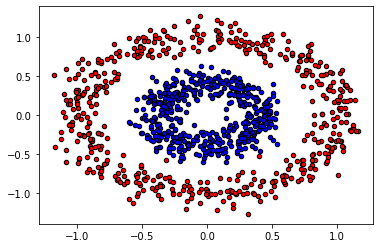

In [13]:
red = predictions == 0
blue = predictions == 1
plt.scatter(data[red, 0], data[red, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blue, 0], data[blue, 1], c="blue", s=20, edgecolor='k')
plt.show()

In [30]:
print(f'Correct: {np.count_nonzero(labels == predictions)}/{data.shape[0]}')

Correct: 998/1000
